In [ ]:
#connect to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing important Libraries

In [ ]:
#installing libraries
!pip install catboost
!pip install fast_ml --quiet ##for train_valid_test_split in catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.2 MB/s eta 0:00:00


In [ ]:
#importing basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import catboost as cb
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing models

from sklearn.linear_model import LinearRegression,Lasso,Ridge

from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
#importing evaluation metrics

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error

In [ ]:
#loading the data
## true unprocessed csv file

df = pd.read_csv("/content/drive/MyDrive/pro - Shreya & Rinky/true_car_listings.csv")

df.shape

(852122, 8)

In [ ]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


# Data Cleaning:

In [ ]:
#Vin(Unique car ID) is unecessary column so we are dropping it
df.drop('Vin',axis=1,inplace=True)
df.shape

(852122, 7)

Removing duplicates

In [ ]:
#checking duplicate data that might be present in the dataset

dfdup=df[df.duplicated()]
dfdup

,Price,Year,Mileage,City,State,Make,Model
314,22000,2017,10,Chicago,IL,Acura,ILXAutomatic
1259,23566,2017,16,Larchmont,NY,Acura,ILXPremium
6258,36000,2018,5,Littleton,CO,Acura,RDXAWD
6356,33900,2017,4250,Salt Lake City,UT,Acura,RDXAWD
7180,38275,2018,5,Littleton,CO,Acura,RDXAWD
...,...,...,...,...,...,...,...
819060,36998,2014,35370,Houston,TX,Toyota,4Runner4x4
819874,32018,2017,6,Mechanicsville,VA,Toyota,Tacoma2WD
824387,16995,2017,15,San Antonio,TX,Volkswagen,Passat1.8T
825336,16996,2017,7787,San Antonio,TX,Volkswagen,Passat1.8T


In [ ]:
#checking shape of dataset
df.shape

(852122, 7)

In [ ]:
#removing duplicated rows from the dataset
df.drop_duplicates(inplace=True)

#again checking for shape of the now data
df.shape

(851568, 7)

Removing null values

In [ ]:
#checking for missing values

df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Make       0
Model      0
dtype: int64

In [ ]:
#checking all datatypes

df.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Make       object
Model      object
dtype: object

Removing extreme values from Price column

# Exploratory Data Analysis:

In [ ]:
#checking the variables

df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Make', 'Model'], dtype='object')

In [ ]:
#getting additional info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851568 entries, 0 to 852121
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    851568 non-null  int64 
 1   Year     851568 non-null  int64 
 2   Mileage  851568 non-null  int64 
 3   City     851568 non-null  object
 4   State    851568 non-null  object
 5   Make     851568 non-null  object
 6   Model    851568 non-null  object
dtypes: int64(3), object(4)
memory usage: 52.0+ MB


In [ ]:
#further describing our dataset

df.describe()

,Price,Year,Mileage
count,851568.000000,851568.000000,8.515680e+05
mean,21458.705582,2013.286910,5.253862e+04
std,13594.437056,3.414859,4.198370e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.386400e+04
50%,18500.000000,2014.000000,4.027900e+04
75%,26995.000000,2016.000000,7.221800e+04
max,499500.000000,2018.000000,2.856196e+06


In [ ]:
#checking number of unique values in the columns

df.nunique()

Price       47124
Year           22
Mileage    158836
City         2553
State          59
Make           58
Model        2736
dtype: int64

Unique values in the columns

In [ ]:
#checking out different classes or labels present in the variables
cat=df.select_dtypes(include=['object']).columns
for i in df.loc[:,cat]:
    print(df[i].value_counts(),'\n\n') ## value_count counts all unique values
    ##dropping all values who has count < 50
    counts = df[i].value_counts()
    df = df[~df[i].isin(counts[counts < 50].index)]

Houston          12697
San Antonio       8074
Louisville        5871
Jacksonville      5672
Austin            5294
                 ...  
Port Jervis          4
Pleasant Hill        4
Armona               4
Pen Argyl            4
Royston              2
Name: City, Length: 2553, dtype: int64 


 TX    93741
 CA    79022
 FL    71425
 GA    38903
 IL    38164
 NC    37069
 VA    34531
 PA    27594
 NY    27336
 NJ    27241
 WA    23029
 CO    22835
 OH    22770
 AZ    22178
 TN    18990
 MA    17198
 MD    16947
 IN    16218
 MO    16068
 KY    13649
 AL    12907
 WI    11164
 CT    10665
 MN    10629
 OR    10301
 UT    10107
 MI     9681
 OK     9496
 SC     9479
 LA     8343
 KS     7844
 AR     6880
 NV     6790
 MS     6111
 NH     5522
 NE     4924
 IA     4768
 NM     4582
 ID     3444
 HI     2911
 DE     2399
 MT     1912
 RI     1818
 ME     1797
 AK     1622
 WV     1458
 SD     1185
 ND     1092
 VT     1029
 Fl      783
 WY      532
 Va      248
 Md      135
 Ga      109
 ga

In [ ]:
df.shape

(818681, 7)

In [ ]:
df_lbe=df.copy()

In [ ]:
cat

Index(['City', 'State', 'Make', 'Model'], dtype='object')

In [ ]:
#converting categorical variables into numerical ones using LabelEncoder so that we can check the coorelation between all variables

from sklearn.preprocessing import LabelEncoder

for i in cat:
    df_lbe[i] = LabelEncoder().fit_transform(df_lbe[i])

In [ ]:
#checking out correlation matrix

df_lbe.corr()

,Price,Year,Mileage,City,State,Make,Model
Price,1.000000,0.437095,-0.444979,-0.015443,0.027127,-0.079957,0.076785
Year,0.437095,1.000000,-0.765428,0.010485,-0.023711,0.023872,-0.014434
Mileage,-0.444979,-0.765428,1.000000,-0.013848,0.024843,-0.032335,0.045073
City,-0.015443,0.010485,-0.013848,1.000000,-0.048887,0.007954,-0.003859
State,0.027127,-0.023711,0.024843,-0.048887,1.000000,-0.003653,0.006630
Make,-0.079957,0.023872,-0.032335,0.007954,-0.003653,1.000000,0.030264
Model,0.076785,-0.014434,0.045073,-0.003859,0.006630,0.030264,1.000000


In [ ]:
# Find most important features relative to target Price

print("Find most important features relative to target")
corr = df_lbe.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)

Find most important features relative to target
Price      1.000000
Year       0.437095
Model      0.076785
State      0.027127
City      -0.015443
Make      -0.079957
Mileage   -0.444979
Name: Price, dtype: float64


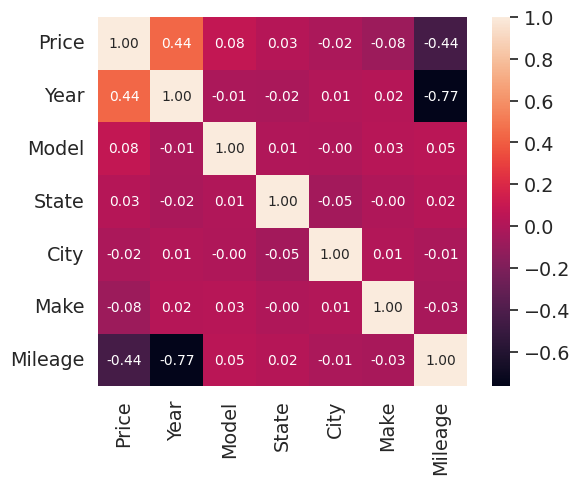

In [ ]:
# Price correlation matrix
k = 7   #number of variables for heatmap
corrmat = df_lbe.corr()
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df_lbe[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Conclusion from correlation matrix:**

Column: Year has a mild positive correlation with trget Price

Column: Mileage has a mild negatve correlation with Price

Column: Make and Model have low positive correlation with target Price

Columns: City and State have have trivial correlation with the target column price

# Feature selection:

In [ ]:
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Make', 'Model'], dtype='object')

In [ ]:
#Dropping City and State as they have minimal correlation for prediction of price
df.drop(['City','State'],axis=1,inplace=True)

In [ ]:
cat=df.select_dtypes(include=['object']).columns

In [ ]:
df.head()

,Price,Year,Mileage,Make,Model
1,10888,2013,19606,Acura,ILX5-Speed
3,10999,2014,39922,Acura,ILX5-Speed
4,14799,2016,22142,Acura,ILXAutomatic
5,7989,2012,105246,Acura,TSXAutomatic
6,14490,2014,34032,Acura,TSXSpecial


In [ ]:
from sklearn.preprocessing import StandardScaler        #scaling the data
##Apply scaling on Independant variables only so price predicted in end by the model does not come scaled

sc= StandardScaler()
sc.fit(df.loc[:,['Year','Mileage']])
##fitting on only x(Independent variables)

df.loc[:,['Year','Mileage']] = sc.transform(df.loc[:,['Year','Mileage']])

**Outlier removal**

In [ ]:
#function to select only rows whose value is > -3 and value < 3

def outlier_removal_zscore(df , cont_columns):
    for col in cont_columns:
        print("Before removing outliers from col=",col)
        print("Shape =",df.shape)
        df = df.loc[(df[col] >= -3)&(df[col] <= 3),:]
        print("After removing outliers from col=",col)
        print("Shape =",df.shape)
    return df

df = outlier_removal_zscore(df.copy(),['Year','Mileage'])

Before removing outliers from col= Year
Shape = (818681, 5)
After removing outliers from col= Year
Shape = (804931, 5)
Before removing outliers from col= Mileage
Shape = (804931, 5)
After removing outliers from col= Mileage
Shape = (797354, 5)


In [ ]:
#converting categorical variables into numerical ones using One Hot Encoder

df = pd.get_dummies(df)

In [ ]:
df.shape

(797354, 1277)

In [ ]:
df=df.sample(50000,random_state=7) #sampling only limited amount of data since there are too many OHE columns

In [ ]:
df.shape

(50000, 1277)

In [ ]:
# Saving the scaled and one hot encoded data with no outliers to an empty csv file
##DO NOT RUN AGAIN
#df.to_csv("/content/drive/MyDrive/pro - Shreya & Rinky/cars_ohe_sc.csv",index= False, header=True)

In [ ]:
#df=pd.read_csv("/content/drive/MyDrive/pro - Shreya & Rinky/cars_ohe_sc.csv")

In [ ]:
df.shape

(50000, 1277)

In [ ]:
#seperating the independant and dependant variables
x = df.drop('Price',axis=1)
y = df['Price']

x.shape,y.shape

((50000, 1276), (50000,))

In [ ]:
#using train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=777,test_size=.30)

**PCA**

In [ ]:
from sklearn.decomposition import PCA

#applying pca to reduce dimensions and setting n_components to 0.98
pca = PCA(n_components = 0.98)

x_train = pca.fit_transform(x_train)

In [ ]:
x_test = pca.transform(x_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_ #eigen values/ total eigen values

In [ ]:
x_train.shape

(35000, 676)

# Building Models:

## Laaso Regression

In [ ]:
#Lasso

ls=Lasso()
ls.fit(x_train,y_train)
predtrain=ls.predict(x_train)
predls=ls.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.128e+09, tolerance: 4.958e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#checking error for Lasso

msels=mean_squared_error(y_test,predls)
maels=mean_absolute_error(y_test,predls)
r2ls=r2_score(y_test,predls)
print(msels)
print(maels)
print(r2ls)

28910370.352732252
3200.514511821493
0.7990412586745311


## Ridge Regression

In [ ]:
#Ridge

lrr=Ridge()
lrr.fit(x_train,y_train)
predlrr=lrr.predict(x_test)
print(r2_score(y_test,predlrr)*100)


81.70848343584713


In [ ]:
#checking error for Ridge

mselrr=mean_squared_error(y_test,predlrr)
maelrr=mean_absolute_error(y_test,predlrr)
r2lrr=r2_score(y_test,predlrr)
print(mselrr)
print(maelrr)
print(r2lrr)

26314581.52528624
2947.8487873351924
0.8170848343584713


## Random Forest Regressor

In [ ]:
#RandomForest

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf)*100)

80.41570919614958


In [ ]:
#checking error for RandomForest

mserf=mean_squared_error(y_test,predrf)
maerf=mean_absolute_error(y_test,predrf)
r2rf=r2_score(y_test,predrf)
print(mserf)
print(maerf)
print(r2rf)

28174395.22662692
2880.621816409524
0.8041570919614958


## Catboost Regression


In [ ]:
X = df.drop('Price',axis=1)
Y = df['Price']

In [ ]:
# Catboost requires validation dataset as well so we are implementing train_valid_test_split method from a fast_ml library

from fast_ml.model_development import train_valid_test_split
X_train,Y_train,X_valid,Y_valid,X_test,Y_test=train_valid_test_split(df,target='Price',train_size=0.6,valid_size=0.2,test_size=0.2,random_state=777)

X_train.shape,Y_train.shape, X_valid.shape,Y_valid.shape,X_test.shape,  Y_test.shape

((30000, 1276), (30000,), (10000, 1276), (10000,), (10000, 1276), (10000,))

In [ ]:
#catboost needs to be given pool of data hence Pool method
train_dataset = cb.Pool(X_train, Y_train)
eval_dataset = cb.Pool(X_valid, Y_valid)

In [ ]:
#Creating model
cbt = cb.CatBoostRegressor(loss_function='RMSE')

In [ ]:
#Running possibilities for the best model
grid = {'iterations': [ 250, 300],
        'learning_rate': [ 0.2,0.5,0.7],
        'depth': [8, 10],
        'l2_leaf_reg': [0.2, 0.4]}
cbt.grid_search(grid, train_dataset)

Streaming output truncated to the last 5000 lines.
41:	learn: 6955.9700441	test: 7255.1079661	best: 7255.1079661 (41)	total: 834ms	remaining: 5.13s
42:	learn: 6921.9623581	test: 7220.5414385	best: 7220.5414385 (42)	total: 854ms	remaining: 5.1s
43:	learn: 6881.1427863	test: 7184.1292651	best: 7184.1292651 (43)	total: 874ms	remaining: 5.08s
44:	learn: 6846.7009618	test: 7137.4235909	best: 7137.4235909 (44)	total: 892ms	remaining: 5.06s
45:	learn: 6816.2292652	test: 7119.5837000	best: 7119.5837000 (45)	total: 922ms	remaining: 5.09s
46:	learn: 6787.5088556	test: 7099.0851610	best: 7099.0851610 (46)	total: 940ms	remaining: 5.06s
47:	learn: 6760.7678046	test: 7080.0754851	best: 7080.0754851 (47)	total: 964ms	remaining: 5.06s
48:	learn: 6729.8440281	test: 7054.9357216	best: 7054.9357216 (48)	total: 987ms	remaining: 5.05s
49:	learn: 6704.0447037	test: 7030.7931330	best: 7030.7931330 (49)	total: 1s	remaining: 5.02s
50:	learn: 6673.2559944	test: 7005.1140692	best: 7005.1140692 (50)	total: 1.02s	

{'params': {'depth': 8,
  'iterations': 250,
  'learning_rate': 0.5,
  'l2_leaf_reg': 0.4},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [ ]:
#fit on best model
cbt.fit(train_dataset,eval_set=eval_dataset,early_stopping_rounds=50,plot=True,use_best_model=True, silent=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 10409.6671938	test: 10429.9033875	best: 10429.9033875 (0)	total: 14.1ms	remaining: 3.51s
1:	learn: 9549.7871006	test: 9597.3242899	best: 9597.3242899 (1)	total: 27.3ms	remaining: 3.38s
2:	learn: 8986.2180805	test: 9037.1927111	best: 9037.1927111 (2)	total: 40.7ms	remaining: 3.35s
3:	learn: 8591.6541400	test: 8680.9916764	best: 8680.9916764 (3)	total: 53.5ms	remaining: 3.29s
4:	learn: 8265.2203984	test: 8446.8226960	best: 8446.8226960 (4)	total: 67ms	remaining: 3.28s
5:	learn: 8023.0244198	test: 8147.7700088	best: 8147.7700088 (5)	total: 83.4ms	remaining: 3.39s
6:	learn: 7826.7256235	test: 7926.8348244	best: 7926.8348244 (6)	total: 96.3ms	remaining: 3.34s
7:	learn: 7660.2453337	test: 7782.6707130	best: 7782.6707130 (7)	total: 109ms	remaining: 3.29s
8:	learn: 7532.1546347	test: 7686.2860118	best: 7686.2860118 (8)	total: 121ms	remaining: 3.25s
9:	learn: 7405.4241886	test: 7577.5562430	best: 7577.5562430 (9)	total: 134ms	remaining: 3.22s
10:	learn: 7279.5264305	test: 7445.8356090

In [ ]:
#evaluation metrics
predcbt = cbt.predict(X_test)
msecbt = (mean_squared_error(Y_test, predcbt))
maecbt = mean_absolute_error(Y_test, predcbt)
r2cbt = r2_score(Y_test, predcbt)

print(msecbt)
print(maecbt)
print(r2cbt)

20457770.70380485
2596.579351178401
0.851610217534246


## XGBoost

In [ ]:
#XGBoost

xgb=XGBRegressor()
xgb.fit(x_train,y_train)
predxgb=xgb.predict(x_test)
print(r2_score(y_test,predxgb)*100)

77.84917476352999


In [ ]:
#checking error for GradientBoosting

msexgb=mean_squared_error(y_test,predxgb)
maexgb=mean_absolute_error(y_test,predxgb)
r2xgb=r2_score(y_test,predxgb)
print(msexgb)
print(maexgb)
print(r2xgb)

31866668.59979161
3692.6774275065104
0.7784917476352998


## NN

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError


In [ ]:
# define model
model1 = Sequential()
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
# model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))


In [ ]:
# loss function
# msle = MeanSquaredLogarithmicError()

model1.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.005),
    metrics=['mae']
)

In [ ]:
# train the model
history = model1.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/25
438/438 [==============================] - 8s 5ms/step - loss: 137140752.0000 - mae: 6966.0171 - val_loss: 30577726.0000 - val_mae: 3406.1130
Epoch 2/25
438/438 [==============================] - 3s 6ms/step - loss: 30799670.0000 - mae: 2990.4158 - val_loss: 22988992.0000 - val_mae: 2995.0996
Epoch 3/25
438/438 [==============================] - 2s 4ms/step - loss: 24534156.0000 - mae: 2720.6313 - val_loss: 19042686.0000 - val_mae: 2615.3176
Epoch 4/25
438/438 [==============================] - 2s 4ms/step - loss: 21824194.0000 - mae: 2598.6443 - val_loss: 17809506.0000 - val_mae: 2532.5300
Epoch 5/25
438/438 [==============================] - 2s 4ms/step - loss: 20454192.0000 - mae: 2542.0610 - val_loss: 17354368.0000 - val_mae: 2615.8428
Epoch 6/25
438/438 [==============================] - 2s 4ms/step - loss: 19576416.0000 - mae: 2500.7322 - val_loss: 16750557.0000 - val_mae: 2487.6074
Epoch 7/25
438/438 [==============================] - 2s 4ms/step - loss: 18904312.0000

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               163456    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 173,825
Trainable params: 173,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
prednn= model1.predict(x_test)
prednn


469/469 [==============================] - 1s 2ms/step


array([[25024.29 ],
       [16655.719],
       [30460.64 ],
       ...,
       [ 7312.421],
       [20297.074],
       [29923.604]], dtype=float32)

In [ ]:
msenn, maenn = model1.evaluate(x_test,y_test)
msenn, maenn
r2nn=r2_score(y_test,prednn)

469/469 [==============================] - 1s 2ms/step - loss: 20280962.0000 - mae: 2464.4556


In [ ]:
print(msenn, maenn, r2nn)

20280962.0 2464.45556640625 0.8590250582285328


# Overall result comparision of all models

In [ ]:
##ALL models used
##                                   Lasso, Ridge, Random Forest, Catboost, XGBoost, NN
results = pd.DataFrame({'Mean Squared Error':[msels,mselrr,mserf,msecbt,msexgb,msenn],
                        'Mean Absolute Error':[maels,maelrr,maerf,maecbt,maexgb,maenn],
                        'Accuracy Score':[r2ls*100,r2lrr*100,r2rf*100,r2cbt*100,r2xgb*100,r2nn*100]},
                       index=['Lasso','Ridge','RandomForestRegressor','CatBoostRegressor','XGBRegressor','NeauralNetworkRegressor'])
result_df = results.sort_values(by='Accuracy Score', ascending=False)
result_df

,Mean Squared Error,Mean Absolute Error,Accuracy Score
NeauralNetworkRegressor,2.028096e+07,2464.455566,85.902506
CatBoostRegressor,2.045777e+07,2596.579351,85.161022
Ridge,2.631458e+07,2947.848787,81.708483
RandomForestRegressor,2.817440e+07,2880.621816,80.415709
Lasso,2.891037e+07,3200.514512,79.904126
XGBRegressor,3.186667e+07,3692.677428,77.849175
